# <u>Bias Variance Tradeoff</u>

<b>Bias</b>-> Bias is the algorithm’s tendency to consistently learn the wrong thing by <b><u>not taking into account all the information in the data</u></b>.”

<b>Variance</b>->  variance is an <b>error from sensitivity to small fluctuations in the training set</b>. High variance can cause an algorithm to model the random noise in the training data, rather than the intended outputs.

<b>Error due to Bias</b>: The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict. Of course you only have one model so talking about expected or average prediction values might seem a little strange. However, imagine you could repeat the whole model building process more than once: each time you gather new data and run a new analysis creating a new model. Due to randomness in the underlying data sets, the resulting models will have a range of predictions. Bias measures how far off in general these models' predictions are from the correct value.
    
    
<b>Error due to Variance</b>: The error due to variance is taken as the variability of a model prediction for a given data point. Again, imagine you can repeat the entire model building process multiple times. The variance is how much the predictions for a given point vary between different realizations of the model.



<img src ='Overfitting.png'></img>

<b>Approach guideline</b>

In [36]:
#import the neccessary modules


import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# load our dataset

In [3]:
d=pd.read_csv('Salaries.csv')
df=d.copy()
df=df.head(100)

In [4]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,MIVIC HIROSE,MANAGER VIII,215180.76,0.00,12000.00,NaN,227180.76,227180.76,2011,NaN,San Francisco,NaN
96,97,SARAH CARY,ANESTHETIST,208925.60,5539.30,12615.60,NaN,227080.50,227080.50,2011,NaN,San Francisco,NaN
97,98,KEVIN SMITH,"BATTALION CHIEF, (FIRE DEPARTMENT)",168692.67,35402.71,22261.95,NaN,226357.33,226357.33,2011,NaN,San Francisco,NaN
98,99,GREGORY STANGLAND,FIRE FIGHTER PARAMEDIC,122404.98,86719.38,15315.61,NaN,224439.97,224439.97,2011,NaN,San Francisco,NaN


In [5]:
X=df[['BasePay']] #input feature
Y=df[['TotalPay']] #feature to be predicted

divide the dataset into train and test set

In [6]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y, test_size=0.3,random_state=0)

In [7]:
Xtest.shape

(30, 1)

In [8]:
Ytest.shape

(30, 1)

In [9]:
lr=LinearRegression()

In [10]:
lr.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
pf=lr.predict(Xtest)

In [12]:
print(lr.intercept_)

[246227.07675972]


In [13]:
Xtrain.shape

(70, 1)

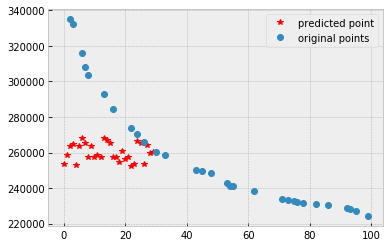

In [37]:
def underfit():
    plt.plot(pf,color='red',linestyle='',marker='*',label='predicted point')
    plt.plot(Ytest,marker='o',linestyle='',label='original points')
    plt.legend()
    
    
underfit()    

Error calculation


In [22]:
mse=mean_squared_error(pf,Ytest)
mse

1081228523.9018416

In [23]:
mae=mean_absolute_error(Ytest,pf)
mae

27584.926662992435

In [24]:
rms=np.sqrt(mean_squared_error(pf,Ytest))
rms

32882.03953379172

In [76]:
abs(lr.score(pf,Ytest))

0.07923820324341091

# Overfitting situation

In [77]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [78]:
ox=df[['BasePay', 'OvertimePay', 'OtherPay',
        'TotalPayBenefits', 'Year']]
oy=df[['TotalPay']]

In [79]:
oxtrain,oxtest,oytrain,oytest=train_test_split(ox,oy,test_size=0.2,random_state=0)

model training

In [83]:
over=LinearRegression()
over.fit(oxtrain,oytrain)

#predict

o_pred=over.predict(oxtest)

In [84]:
over.intercept_

array([-8.73114914e-11])

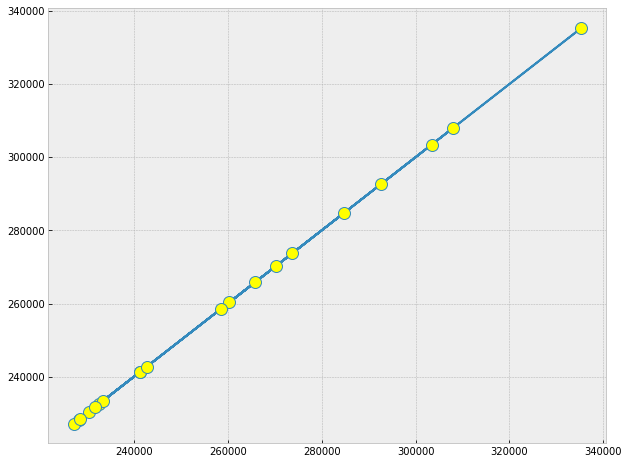

In [89]:
plt.figure(figsize=(10,8))
plt.plot(o_pred,oytest,marker='o',markerfacecolor='yellow',markersize=12)

In [91]:
over.score(oxtest,oytest)

1.0

error

In [92]:
MSE=mean_squared_error(o_pred,oytest)
MAE


3.2014213502407077e-11

In [93]:
MAE=mean_absolute_error(o_pred,oytest)
MAE

2.3283064365386964e-11

In [94]:
RMSE=np.sqrt(mean_squared_error(o_pred,oytest))
RMSE

3.564476708973493e-11